# Importing Libraries

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from prettytable import PrettyTable as ptbl

# Function Definition

In [2]:
def SOR(a,x,B,N,E,W = 1.0):
    
    # Copying input arguments into local arguments to avoid data Over-writing
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    w = copy.copy(W)

    print("\n***** Succesive Over Relaxation *****")

    # List to hold column titles for Making table
    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('x'+str(i+1))
    lst.append('Max Error')
    
    # List to hold data which is to be displayed in table
    outputlist=[]
    
    # List to hold data which is to be used to plot graph i.e. iteration count and corresponding accuracy
    accuracy = []
    
    condition = True
    count = 0

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            for j in range (i):
                X[j] = X_new[j]
            
            tmp = 0
            n = len(A)
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (1-w)*X_prev[i] + w*((b[i] - tmp)/A[i][i])
            
        temp = []
        temp.append(count)
        # Displaying iteration data and adding it to a local list so that local list can then 
        print(f'Iteration = {count}',end="\t")
        for i in range(n):
            print(f'  x{i+1} = {X_new[i]:.6f}', end = "\t")
            temp.append(X_new[i])
        print()
        

        accuracyReached = abs(X_new[0] - X_prev[0])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i]))
        
        temp.append(accuracyReached)
        outputlist.append(temp)         # Adding data to outputlist (for making table)

        accuracy.append([count+1,accuracyReached])          # Adding data to accuracy list (for plotting graphs)
        
        count += 1
        for i in range(n):
            X[i] = copy.copy(X_new[i])

        if accuracyReached<=e:
            condition = False
            # Adding final iteration to table
            final_accuracyReached = abs(X_new[0] - X_prev[0])
            for i in range(1,n):
                final_accuracyReached = max(final_accuracyReached,abs(X_new[i] - X_prev[i]))
            
            final_temp = []
            final_temp.append(count)
            
            for i in range(n):
                final_temp.append(X_new[i])
            final_temp.append(accuracyReached)
            outputlist.append(final_temp)         # Adding data to outputlist (for making table)    
        
        else:
            condition = True


    # Making Table and pushing data in it
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)

    # Printing Result
    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]:.6f}', end = "\t")
    print()

    return accuracy, table

# Input Section

In [3]:
n = 6
A = np.array([
            [3.,-2.,1.,0.,0.,1.],
            [-2.,4.,-2.,1.,0.,0.],
            [1.,-2.,4.,-2.,1.,0.],
            [0.,1.,-2.,4.,-2.,1.],
            [0.,0.,1.,-2.,4.,-2.],
            [1.,0.,0.,1.,-2.,3.]
            ])

b = np.array([10.,-8.,10.,10.,-8.,10.])

# initial Guesses
X = np.array([0.,0.,0.,0.,0.,0.])

# Reading tolerable error
e = 0.00001


## w = 0.9

In [4]:

w = 0.9

sor_0_9, table_0_9 = SOR(A,X,b,n,e,w)
sor_0_9_count = []
sor_0_9_accuracy = []
for i in sor_0_9:
    sor_0_9_count.append(i[0])
    sor_0_9_accuracy.append(i[1])


***** Succesive Over Relaxation *****
Iteration = 0	  x1 = 3.000000	  x2 = -0.450000	  x3 = 1.372500	  x4 = 2.968875	  x5 = -0.772819	  x6 = 0.745646	
Iteration = 1	  x1 = 2.394556	  x2 = -0.817822	  x3 = 2.990333	  x4 = 3.561008	  x5 = -0.612112	  x6 = 0.920628	
Iteration = 2	  x1 = 1.575474	  x2 = -0.628396	  x3 = 3.651953	  x4 = 3.908277	  x5 = -0.509893	  x6 = 1.141001	
Iteration = 3	  x1 = 1.342624	  x2 = -0.494642	  x3 = 3.963966	  x4 = 4.049730	  x5 = -0.407053	  x6 = 1.252162	
Iteration = 4	  x1 = 1.272638	  x2 = -0.404181	  x3 = 4.092137	  x4 = 4.122465	  x5 = -0.342854	  x6 = 1.300973	
Iteration = 5	  x1 = 1.266822	  x2 = -0.356441	  x3 = 4.146031	  x4 = 4.161157	  x5 = -0.309184	  x6 = 1.316193	
Iteration = 6	  x1 = 1.274150	  x2 = -0.332823	  x3 = 4.170236	  x4 = 4.182331	  x5 = -0.294886	  x6 = 1.317744	
Iteration = 7	  x1 = 1.281327	  x2 = -0.321103	  x3 = 4.182627	  x4 = 4.193472	  x5 = -0.290532	  x6 = 1.315015	
Iteration = 8	  x1 = 1.286178	  x2 = -0.314679	  x3 = 4.1

In [5]:
print(table_0_9)

+-----------+--------------------+----------------------+--------------------+--------------------+----------------------+--------------------+------------------------+
| Iteration |         x1         |          x2          |         x3         |         x4         |          x5          |         x6         |       Max Error        |
+-----------+--------------------+----------------------+--------------------+--------------------+----------------------+--------------------+------------------------+
|     0     |        3.0         |        -0.45         |       1.3725       |      2.968875      | -0.7728187499999999  |     0.74564625     |          3.0           |
|     1     |    2.394556125     | -0.8178216187500003  | 2.9903331121875003 | 3.5610084209531254 | -0.6121122233132812  | 0.9206279272260935 |   1.6178331121875003   |
|     2     | 1.5754743294259215 | -0.6283957078634135  | 3.6519525582337766 | 3.908276743452933  |  -0.509893446128366  | 1.1410014031819333 |   0.8190817

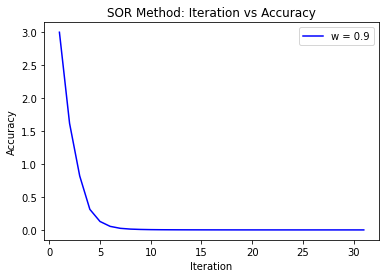

In [6]:
plt.title("SOR Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(sor_0_9_count,sor_0_9_accuracy,color = 'blue',label='w = 0.9')
plt.legend()
plt.show()

## w = 1.0

In [7]:
w = 1.0

sor_1_0, table_1_0 = SOR(A,X,b,n,e,w)
sor_1_0_count = []
sor_1_0_accuracy = []
for i in sor_1_0:
    sor_1_0_count.append(i[0])
    sor_1_0_accuracy.append(i[1])


***** Succesive Over Relaxation *****
Iteration = 0	  x1 = 3.333333	  x2 = -0.333333	  x3 = 1.500000	  x4 = 3.333333	  x5 = -0.708333	  x6 = 0.638889	
Iteration = 1	  x1 = 2.398148	  x2 = -0.884259	  x3 = 3.302083	  x4 = 3.858218	  x5 = -0.576968	  x6 = 0.863233	
Iteration = 2	  x1 = 1.355388	  x2 = -0.635819	  x3 = 3.916594	  x4 = 4.112960	  x5 = -0.491052	  x6 = 1.183182	
Iteration = 3	  x1 = 1.209529	  x2 = -0.465178	  x3 = 4.144272	  x4 = 4.147109	  x5 = -0.370922	  x6 = 1.300506	
Iteration = 4	  x1 = 1.208289	  x2 = -0.360497	  x3 = 4.183964	  x4 = 4.171519	  x5 = -0.309979	  x6 = 1.333412	
Iteration = 5	  x1 = 1.253877	  x2 = -0.323959	  x3 = 4.187805	  x4 = 4.186550	  x5 = -0.286970	  x6 = 1.328544	
Iteration = 6	  x1 = 1.278577	  x2 = -0.313446	  x3 = 4.188650	  x4 = 4.197065	  x5 = -0.284358	  x6 = 1.318547	
Iteration = 7	  x1 = 1.288637	  x2 = -0.310623	  x3 = 4.192152	  x4 = 4.201916	  x5 = -0.287806	  x6 = 1.311278	
Iteration = 8	  x1 = 1.291775	  x2 = -0.308516	  x3 = 4.1

In [8]:
print(table_1_0)

+-----------+--------------------+----------------------+--------------------+--------------------+----------------------+--------------------+------------------------+
| Iteration |         x1         |          x2          |         x3         |         x4         |          x5          |         x6         |       Max Error        |
+-----------+--------------------+----------------------+--------------------+--------------------+----------------------+--------------------+------------------------+
|     0     | 3.3333333333333335 | -0.33333333333333326 |        1.5         | 3.333333333333333  | -0.7083333333333335  | 0.6388888888888893 |   3.3333333333333335   |
|     1     | 2.3981481481481484 | -0.8842592592592591  | 3.3020833333333335 | 3.8582175925925926 | -0.5769675925925926  | 0.8632330246913581 |   1.8020833333333335   |
|     2     | 1.3553883744855968 | -0.6358185442386832  | 3.9165943287037033 | 4.112959747942386  | -0.4910521958590537  | 1.1831824952846366 |   1.0427597

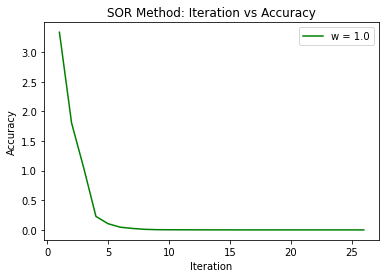

In [9]:
plt.title("SOR Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(sor_1_0_count,sor_1_0_accuracy,color = 'green',label='w = 1.0')
plt.legend()
plt.show()

## w = 1.2

In [10]:
w = 1.2

sor_1_2, table_1_2 = SOR(A,X,b,n,e,w)
sor_1_2_count = []
sor_1_2_accuracy = []
for i in sor_1_2:
    sor_1_2_count.append(i[0])
    sor_1_2_accuracy.append(i[1])


***** Succesive Over Relaxation *****
Iteration = 0	  x1 = 4.000000	  x2 = 0.000000	  x3 = 1.800000	  x4 = 4.080000	  x5 = -0.492000	  x6 = 0.374400	
Iteration = 1	  x1 = 2.330240	  x2 = -1.145856	  x3 = 3.849014	  x4 = 4.429645	  x5 = -0.573877	  x6 = 0.762064	
Iteration = 2	  x1 = 0.772836	  x2 = -0.726612	  x3 = 4.392329	  x4 = 4.394507	  x5 = -0.508981	  x6 = 1.373465	
Iteration = 3	  x1 = 0.957825	  x2 = -0.362937	  x3 = 4.405823	  x4 = 4.156045	  x5 = -0.302244	  x6 = 1.437963	
Iteration = 4	  x1 = 1.180571	  x2 = -0.222390	  x3 = 4.215531	  x4 = 4.152091	  x5 = -0.250178	  x6 = 1.379200	
Iteration = 5	  x1 = 1.348081	  x2 = -0.262982	  x3 = 4.160988	  x4 = 4.181202	  x5 = -0.262019	  x6 = 1.302831	
Iteration = 6	  x1 = 1.334470	  x2 = -0.304489	  x3 = 4.172095	  x4 = 4.210302	  x5 = -0.291345	  x6 = 1.288449	
Iteration = 7	  x1 = 1.305297	  x2 = -0.315758	  x3 = 4.198122	  x4 = 4.210199	  x5 = -0.301979	  x6 = 1.294529	
Iteration = 8	  x1 = 1.289274	  x2 = -0.307470	  x3 = 4.20

In [11]:
print(table_1_2)

+-----------+--------------------+----------------------+--------------------+--------------------+----------------------+--------------------+------------------------+
| Iteration |         x1         |          x2          |         x3         |         x4         |          x5          |         x6         |       Max Error        |
+-----------+--------------------+----------------------+--------------------+--------------------+----------------------+--------------------+------------------------+
|     0     |        4.0         |         0.0          | 1.7999999999999998 |        4.08        | -0.4919999999999999  |       0.3744       |          4.08          |
|     1     | 2.3302400000000003 | -1.1458559999999995  |     3.8490144      | 4.429645440000001  | -0.5738770559999995  | 0.7620641791999997 |   2.0490144000000003   |
|     2     | 0.7728357683200004 | -0.7266123310079997  | 4.392329371699201  | 4.3945067469619215 | -0.5089808446126077  | 1.3734654823571453 |   1.5574042

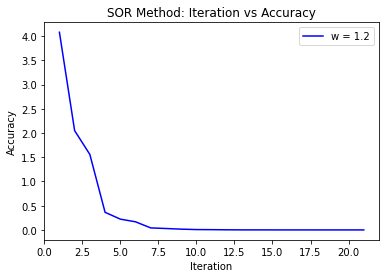

In [12]:
plt.title("SOR Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(sor_1_2_count,sor_1_2_accuracy,color = 'blue',label='w = 1.2')
plt.legend()
plt.show()

# Combined Plot

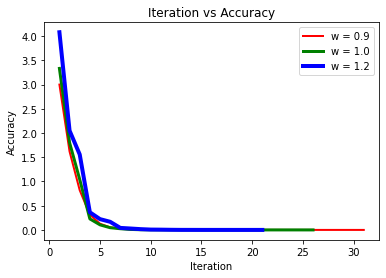

In [13]:
plt.title("Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(sor_0_9_count,sor_0_9_accuracy,color = 'red',label = 'w = 0.9',linewidth=2)
plt.plot(sor_1_0_count,sor_1_0_accuracy,color = 'green',label = 'w = 1.0',linewidth=3)
plt.plot(sor_1_2_count,sor_1_2_accuracy,color = 'blue',label = 'w = 1.2',linewidth=4)
plt.legend()
plt.show()

# Convergence Test
## Function For printing Matrices

In [14]:
def printMatrix(V):
    n = len(V)
    m = len(V[0])
    for i in range(n):
        for j in range(m):
                     
            print(f'{V[i][j]:15.08f}' ,  end="  ")
            
        print()
    print()

## Checking for Diagonal Dominance

In [15]:
def dom(A,n):
    for i in range(n):
        sum = 0
        for j in range(n):
            if(i!=j):
                sum+=abs(A[i][j])
        if(abs(A[i][i])<sum):
            return "GIVEN MATRIX IS NOT DIAGONALLY DOMINANT"
    return "GIVEN MATRIX IS DIAGONALLY DOMINANT"

In [16]:
dom(A,n)

'GIVEN MATRIX IS NOT DIAGONALLY DOMINANT'

## Making L D U

In [17]:
# Making D, L, U

D = np.zeros((n,n))
L = np.zeros((n,n))
U = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i<j:
            U[i][j] = copy.copy(-A[i][j])
        elif i>j:
            L[i][j] = copy.copy(-A[i][j])
        else:
            D[i][j] = copy.copy(A[i][j])

print("D = ")
printMatrix(D)

print("L = ")
printMatrix(L)

print("U = ")
printMatrix(U)

D = 
     3.00000000       0.00000000       0.00000000       0.00000000       0.00000000       0.00000000  
     0.00000000       4.00000000       0.00000000       0.00000000       0.00000000       0.00000000  
     0.00000000       0.00000000       4.00000000       0.00000000       0.00000000       0.00000000  
     0.00000000       0.00000000       0.00000000       4.00000000       0.00000000       0.00000000  
     0.00000000       0.00000000       0.00000000       0.00000000       4.00000000       0.00000000  
     0.00000000       0.00000000       0.00000000       0.00000000       0.00000000       3.00000000  

L = 
     0.00000000       0.00000000       0.00000000       0.00000000       0.00000000       0.00000000  
     2.00000000       0.00000000       0.00000000       0.00000000       0.00000000       0.00000000  
    -1.00000000       2.00000000       0.00000000       0.00000000       0.00000000       0.00000000  
    -0.00000000      -1.00000000       2.00000000       0.0000

## Convergence of Gauss-Siedel Method

In [18]:
# Gauss-Siedel  G = (inv(D-L))*U
DL = D-L
invDL = np.linalg.inv(DL)

print("inverse(D) = ")
printMatrix(invDL)

print("L + U = ")
printMatrix(L+U)

G = np.matmul(invDL,U)

print("G = ")
printMatrix(G)
X,V = np.linalg.eig(G)

print("Eigen Values are:")
for i in X:
    print(i)

inverse(D) = 
     0.33333333       0.00000000       0.00000000       0.00000000       0.00000000       0.00000000  
     0.16666667       0.25000000       0.00000000       0.00000000       0.00000000       0.00000000  
     0.00000000       0.12500000       0.25000000       0.00000000       0.00000000       0.00000000  
    -0.04166667       0.00000000       0.12500000       0.25000000       0.00000000       0.00000000  
    -0.02083333      -0.03125000       0.00000000       0.12500000       0.25000000       0.00000000  
    -0.11111111      -0.02083333      -0.04166667       0.00000000       0.16666667       0.33333333  

L + U = 
     0.00000000       2.00000000      -1.00000000       0.00000000       0.00000000      -1.00000000  
     2.00000000       0.00000000       2.00000000      -1.00000000       0.00000000       0.00000000  
    -1.00000000       2.00000000       0.00000000       2.00000000      -1.00000000       0.00000000  
     0.00000000      -1.00000000       2.00000000